<h1><center>Simple Linear Regression of Titanic Data</center></h1>


<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement simple linear regression to the Titanic Data. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

In [135]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [136]:
train=pd.read_csv('datasets/train.csv')
test=pd.read_csv('datasets/test.csv')

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
combine=[train,test]

In [139]:
result = pd.concat(combine, ignore_index=True, sort=False)

In [140]:
result

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [141]:
result.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [142]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22072850>]],
      dtype=object)

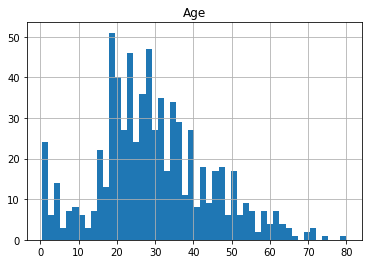

In [143]:
train.hist(column='Age', bins=50)

In [144]:
result['Pclass_1']=(result['Pclass']==1).astype(int)
result['Pclass_2']=(result['Pclass']==2).astype(int)
result['IsFemale']=(result['Sex']=='female').astype(int)

In [145]:
result['Title'] = result.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(result['Title'], result['Survived'])
#pd.crosstab(result['Age'], result['Survived'])
#pd.crosstab(result['Survived'], result['Age'])

Survived,0.0,1.0
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [146]:
result['Title'] = result['Title'].replace(['Col','Dr', 'Rev', 'Dona'], 'Rare')
result['Title'] = result['Title'].replace('Mlle', 'Miss')
result['Title'] = result['Title'].replace('Ms', 'Miss')
result['Title'] = result['Title'].replace('Mme', 'Mrs')
    

In [147]:
pd.crosstab(result['Title'], result['Survived'])

Survived,0.0,1.0
Title,,
Capt,1,0
Countess,0,1
Don,1,0
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,130
Mr,436,81


In [148]:
result['Miss']=(result['Title']=='Miss').astype(int)
result['Mrs']=(result['Title']=='Mrs').astype(int)
result['Mr']=(result['Title']=='Mr').astype(int)
result['Rare']=(result['Title']=='Rare').astype(int)

In [149]:
pd.crosstab(result['Survived'], [result['SibSp'],result['Sex']])
pd.crosstab(result['SibSp'], [result['Age'],result['Survived']])

Age      0.42  0.67  0.75  0.83  0.92  1.00      2.00      3.00   ... 62.00  \
Survived   1.0   1.0   1.0   1.0   1.0   0.0 1.0   0.0 1.0   0.0  ...   1.0   
SibSp                                                             ...         
0            1     0     0     1     0     0   2     1   1     0  ...     2   
1            0     1     0     1     1     0   2     1   2     0  ...     0   
2            0     0     2     0     0     0   1     0   0     0  ...     0   
3            0     0     0     0     0     0   0     2   0     1  ...     0   
4            0     0     0     0     0     1   0     3   0     0  ...     0   
5            0     0     0     0     0     1   0     0   0     0  ...     0   

Age      63.00 64.00 65.00 66.00 70.00 70.50 71.00 74.00 80.00  
Survived   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  
SibSp                                                           
0            1     1     3     1     1     1     2     1     1  
1            1     1     0     0     1     0     0     0     0  
2            0     0     0     0     0     0     0     0     0  
3            0     0     0     0     0     0     0     0     0  
4            0     0     0     0     0     0     0     0     0  
5            0     0     0     0     0     0     0     0     0  

[6 rows x 142 columns]

In [150]:
result.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [151]:
result['Surname']=result.Name.str.extract('([A-Za-z]+),', expand=False)

In [152]:
result.groupby('Surname')['PassengerId'].nunique()

Surname
Abbing         1
Abbott         3
Abelseth       2
Abelson        2
Abrahamsson    1
              ..
Yrois          1
Zabour         2
Zakarian       2
Zimmerman      1
hoef           1
Name: PassengerId, Length: 872, dtype: int64

In [153]:
pd.crosstab(result['Parch'], result['Age'])

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,...,64.00,65.00,66.00,67.00,70.00,70.50,71.00,74.00,76.00,80.00
Parch,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,1,2,1,1,1
1,0,0,1,1,3,2,0,5,9,5,...,1,1,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,2,5,3,2,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
result['IsAlone']=((result.Parch == 0) & (result.SibSp == 0)).astype(int)

In [156]:
del result['Cabin']
result = result.dropna()

In [158]:
result.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,IsFemale,Miss,Mrs,Mr,Rare,IsAlone
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.258427,0.242978,0.363764,0.207865,0.151685,0.558989,0.019663,0.564607
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.438078,0.429183,0.481420,0.406065,0.358968,0.496857,0.138937,0.496157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
X = result[['Age', 'SibSp','Parch','Fare','Pclass_1','Pclass_2','IsFemale','Mrs','Mr','Rare','IsAlone']] .values  #.astype(float)
X[0:5]

poly = PolynomialFeatures(degree=2)
Xp = poly.fit_transform(X)
Xp

array([[ 1., 22.,  1., ...,  0.,  0.,  0.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       [ 1., 32.,  0., ...,  0.,  0.,  1.]])

In [178]:
y = result['Survived'].values

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (569, 11) (569,)
Test set: (143, 11) (143,)


In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [182]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 0., 0., 0., 0.])

In [183]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7785588752196837
Test set Accuracy:  0.6993006993006993


In [184]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.60839161, 0.62237762, 0.66433566, 0.68531469, 0.71328671,
       0.66433566, 0.6993007 , 0.66433566, 0.69230769])

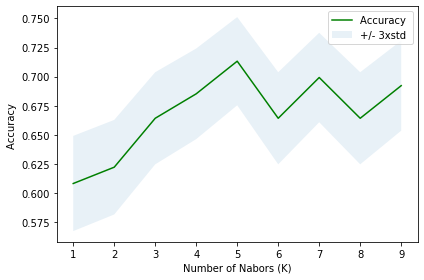

In [185]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [186]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7132867132867133 with k= 5
